# Projet Quadratic Assignment Problem

*Antoine PERRIN & Matthieu CAYET*

In [1]:
# Appelles techniques

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from Services.Fitness import Fitness as ft
import numpy as np
import matplotlib.pyplot as plt

## Présentation

### Jeux de données

Pour ce projet, nous avons utilisé les [instances "Tai..a" de Taillard](http://anjos.mgi.polymtl.ca/qaplib/inst.html#Ta). Chaque instance est caractérisé par:
* un nombre *n* équivalent à la taille de l'instance
* une matrice de distances *A*
* une matrice de flux (ou de poids) *B*

Nous utilisons les instances suivantes:
* Tai12a
* Tai15a
* Tai17a
* Tai20a
* Tai25a
* Tai30a
* Tai35a
* Tai40a
* Tai50a
* Tai60a
* Tai80a
* Tai100a

#### Exemple d'instance Taillard 12

In [2]:
import pandas as pd
from Models.TaillardParser import TaillardParser as tp

tai12a = tp('tai12a.dat')

##### Matrice de distance

In [3]:
pd.DataFrame(tai12a.get_distance_matrix())

,0,1,2,3,4,5,6,7,8,9,10,11
0,0,27,85,2,1,15,11,35,11,20,21,61
1,27,0,80,58,21,76,72,44,85,94,90,51
2,85,80,0,3,48,29,90,66,41,15,83,96
3,2,58,3,0,74,45,65,40,54,83,14,71
4,1,21,48,74,0,77,36,53,37,26,87,76
5,15,76,29,45,77,0,91,13,29,11,77,32
6,11,72,90,65,36,91,0,87,67,94,79,2
7,35,44,66,40,53,13,87,0,10,99,56,70
8,11,85,41,54,37,29,67,10,0,99,60,4
9,20,94,15,83,26,11,94,99,99,0,56,2


##### Matrice de flux

In [4]:
pd.DataFrame(tai12a.get_connexion_matrix())

,0,1,2,3,4,5,6,7,8,9,10,11
0,0,21,95,82,56,41,6,25,10,4,63,6.0
1,21,0,44,40,75,79,0,89,35,9,1,85.0
2,95,44,0,84,12,0,26,91,11,35,82,26.0
3,82,40,84,0,69,56,86,45,91,59,18,76.0
4,56,75,12,69,0,39,18,57,36,61,36,21.0
5,41,79,0,56,39,0,71,11,29,82,82,6.0
6,6,0,26,86,18,71,0,71,8,77,74,30.0
7,25,89,91,45,57,11,71,0,89,76,76,40.0
8,10,35,11,91,36,29,8,89,0,93,56,1.0
9,4,9,35,59,61,82,77,76,93,0,50,4.0


### Voisinage

Afin de varier les résultats possibles, nous avons implémenter plusieurs manières de calculer le voisinage d'un élement.

*Par soucis de compéhension, l'ensemble des exemples de cette partie se font sur l'instance Tai12a.*

In [5]:
from Services.Voisinage import Voisinage as vn

#### Voisinage par distance

Ce fut notre première manière d'implémenter le voisinage.

Son principe est simple. Nous intervertissons uniquement les éléments dont la distance est inférieur à la distance maximale définie.

La méthode `get_permutations_by_distances` nous permet de calculer à l'avance la liste des emplacements à échanger à chaque nouveau calcul de voisinage.

##### Exemple

In [6]:
vn_distance = vn(tai12a.get_distance_matrix(),"distances",1)
def show_vn_distance(vn,distance):
    df = pd.DataFrame(vn.get_permutations_by_distances(vn.distances, distance), columns=['a','b'])
    print(df.to_string(index=False))

display(interactive(show_vn_distance, vn=fixed(vn_distance), distance=(1,100)))

interactive(children=(IntSlider(value=50, description='distance', min=1), Output()), _dom_classes=('widget-int…

Nous récupérons ainsi la liste des éléments ayant une distance inférieure à la distance sélectionnée.

##### Avantages

Le gros avantage de cette technique est qu'elle rapide puisqu'elle necessite de parcour la matrice de distance qu'une seule fois.

De plus, il est facile ce mode de sélection puisque nous cherchons la liste des emplacements "physiquements" proches.

##### Inconvénients

Nous avons trouvé plusieurs inconvénients à cette méthode.

La première est qu'il se peut que des emplacements ne soient jamais sélectionner si leur distance minimale est supérieur à la distance sélectionnée.

Ensuite, avec un nombre plus importants de emplacements, notre tableau risque de grossir énormément vite.

#### Voisinage aléatoire

Nous tirons aléatoirement une liste de permutations parmit toutes les permutations de l'instance.

##### Exemple

In [7]:
vn_random = vn(tai12a.get_distance_matrix(),"random",15)

def show_vn_random(vn,taille):
    permutations = vn.get_permutations_random(vn.distances, taille)
    df = pd.DataFrame(permutations, columns=['a','b'])
    print(df.to_string(index=False))

display(interactive(show_vn_random, vn=fixed(vn_random), taille=(1,70)))

interactive(children=(IntSlider(value=35, description='taille', max=70, min=1), Output()), _dom_classes=('widg…

##### Avantages

Chaque emplacements à la meme probabilité d'apparaitre dans une liste de voisins meme s'il est isolé des autres emplacements.

##### Inconvénients

Fonctionnement non déterministe, nous ne pouvons pas assurer qu'un emplacement soit visiter au moins une fois.

#### Voisinage complet

Nous récupérons l'ensemble des possiblités de permutations de notre instance.

##### Exemple

In [8]:
vn_default = vn(tai12a.get_distance_matrix())

def show_vn_default(vn):
    df = pd.DataFrame(vn.get_permutations(vn.distances), columns=['a','b'])
    print(df.to_string(index=False))

display(interactive(show_vn_default, vn=fixed(vn_default)))

interactive(children=(Output(),), _dom_classes=('widget-interact',))

##### Avantages

Cette façon de calculer les voisins est déterministe. Nous sommes sur que l'ensemble des voisins soient visiter.

##### Inconvénients

Cette façon de faire est lourde et la liste grandit de façon exponentielle suivant le nombre d'emplacements total.

### Algorithmes QAP

Afin de vérifier le bon fonctionnement de nos algorithmes, nous avons utiliser la librairie de tests unitaires `unittest`.

Tous nos tests sont accessibles dans le dossier `Tests` présent à la source de notre projet.

#### Recuit Simulé

##### Code

La méthode de résolution du QAP par l'algorithme du Recuit Simulé a été implémenté ainsi:

```python
def resolve(self, x: list, t: float, numberchangetemp: int, numbermovestemp: int, mu: float):
    xmin = nextx = x
    fmin = fx = fnextx = self.fitness.calcul(x)

    # instanciate var
    delta = 0
    y = []
    fy = 0
    k = 0

    for k in range(0, numberchangetemp):
        for l in range(1, numbermovestemp):
            x = nextx
            fx = fnextx
            # select y
            y = random.choice(self.voisinage.get_voisins(x))
            fy = self.fitness.calcul(y)
            delta = fy - fx

            if delta <= 0:
                nextx = y
                fnextx = fy
                if fy < fmin:
                    xmin = y
                    fmin = fy
            else:
                p = round(random.uniform(0,1), 1)
                if p <= math.exp(-delta / t):
                    nextx = y
                else:
                    nextx = x
        t = mu * t
        k = k + 1

    return xmin
```

##### Explications

Notre méthode prend en paramètres:
* une combinaison initiale `x` tirée de notre instance.
* une température `t` qui est notre température initiale
* un nombre de changement de température `numberchangetemp`
* un nombre de déplacement à une température `numbermovestemp`
* une constante `mu` qui est le coefficient chargé de faire varier la température. 

Pour chaque température, nous allons visiter un voisin tiré au hasard de `x`.
Si ce voisin a une meilleure fitness, nous le choisissons. Sinon suivant la valeur aléatoire tirée, soit nous choisissons notre `x` actuel, soit c'est le voisin que nous venons de tiré qui sera utilisé.

Une fois tous les changements de températures éffectués, l'algorithme nous retourne la combinaison ayant la plus petite fitness.

##### Démonstration

In [9]:
from Services.Recuit import Recuit as recuit

recuit_distances = tai12a.get_distance_matrix()
recuit_connexions = tai12a.get_connexion_matrix()

def interactive_voisinage(distances: list, taille:int, type = "default"):
    if(taille == -1):
        temp_vn = vn(distances, type)
    else:
        temp_vn = vn(distances, type, taille)
    print("Permutations: "+ "".join(str(e) for e in temp_vn.permutations))
    return temp_vn

interactive_recuit_vn = interactive(interactive_voisinage, distances=fixed(recuit_distances), type=["tout", "random", "distances"], taille=range(-1,100))

display(interactive_recuit_vn)

recuit_ft = ft(recuit_connexions, recuit_distances)

demo_recuit = recuit(recuit_distances, recuit_connexions, interactive_recuit_vn.result, recuit_ft)

def interactive_recuit(recuit, temperature:float, changements_temperature: int, mouvements_temperature:int, mu: float):
    solution = recuit.resolve([0,1,2,3,4,5,6,7,8,9,10,11],
                              temperature,
                              changements_temperature,
                              mouvements_temperature,
                              mu)
    print("Solution: "+ "".join(str(e) for e in solution))
    print("Fitness: " + str(recuit_ft.calcul(solution)))

interact_manual(interactive_recuit,
         recuit=fixed(demo_recuit),
         temperature=(0.1,200,0.1),
         changements_temperature=(1,100),
         mouvements_temperature=(1,100),
         mu=(0.1,1))

interactive(children=(Dropdown(description='taille', options=(-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13…

interactive(children=(FloatSlider(value=100.0, description='temperature', max=200.0, min=0.1), IntSlider(value…

<function __main__.interactive_recuit(recuit, temperature: float, changements_temperature: int, mouvements_temperature: int, mu: float)>

#### Méthode Tabou

##### Code

La méthode de résolution du QAP par l'algorithme du Tabou a été implémenté ainsi:

```python
def resolve(self, x: list, tabousize: int, maxIter = 1000):
    xmin = nextx = x
    fx = fmin = fnextx = self.fitness.calcul(x)
    tabou = []
    tabou.append(x)
    C = []

    for i in range(0, maxIter):
        C = self.voisinage.get_voisins(x , tabou)
        miny = self.getMinY(C)
        nextx = miny['x']
        fnextx = miny['f']

        deltaf = fnextx - fx
        if (deltaf <= 0):
            tabou.append(nextx)
            if (len(tabou) > tabousize):
                tabou = tabou[1:]
        if (fnextx < fmin):
            xmin = nextx
            fmin = fnextx
        x = nextx
        fx = fnextx

    return xmin
```

##### Explications

Notre méthode prend en paramètres:
* une combinaison initiale `x` tirée de notre instance.
* la taille de notre liste tabou `tabousize`
* un nombre maximal d'itérations `maxiter`

Pour chaque emplacement, nous allons récupérer tous ses voisons qui ne sont pas déjà dans notre liste tabou. Parmi tous ces voisons, nous allons garder celui ayant la meilleure fitness.

Si la différence entre la fitness du voisin et celle de notre `x` actuel est négative, alors le voisin est ajouté à la liste Tabou.

Une fois le nombre de changement maximal atteind, l'algorithme nous retourne la combinaison ayant la plus petite fitness.

##### Démonstration

In [10]:
from Services.Tabou import Tabou as tabou

tabou_distances = tai12a.get_distance_matrix()
tabou_connexions = tai12a.get_connexion_matrix()


interactive_tabou_vn = interactive(interactive_voisinage, distances=fixed(tabou_distances), type=["tout", "random", "distances"], taille=range(-1,100))

display(interactive_tabou_vn)

tabou_ft = ft(tabou_connexions, tabou_distances)

demo_tabou = tabou(tabou_distances, tabou_connexions, interactive_tabou_vn.result, tabou_ft)

def interactive_tabou(tabou, taille: int, maxiter=1000):
    x = interactive_tabou_vn.result.get_random_x()
    print("x de départ: "+ " ".join(str(e) for e in x))
    
    solution = tabou.resolve(x,
                              taille,
                              maxiter)
    print("Solution: "+ " ".join(str(e) for e in solution))
    print("Fitness:" + str(tabou_ft.calcul(solution)))

interact_manual(interactive_tabou,
         tabou=fixed(demo_tabou),
         taille=(1,50),
         maxiter=(1,10000))

interactive(children=(Dropdown(description='taille', options=(-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13…

interactive(children=(IntSlider(value=25, description='taille', max=50, min=1), IntSlider(value=1000, descript…

<function __main__.interactive_tabou(tabou, taille: int, maxiter=1000)>

## Analyse

### Introduction

Pour chaque itération présentée dans la partie qui suit, nous avons décider de passer chaque algorithme cinquante fois par instance. De ces résultats, nous avons extrait la solution retournée et la durée d'execution du processus afin d'évaluer la qualité de notre implémentation.

Une boite à moustache nous permettra de visualiser les différentes fitness.

Afin d'assurer la cohérence des résultats, certaines variables restent inchangées d'une itération à une autre.

Pour le calcul du voisinage, le nombre de voisins est une constante qui est de 50. Chaque voisin est générer aléatoirement parmi la liste de toutes les permutations.

Pour l'algorithme du Recuit Simulé, les constantes sont les suivantes:
* la **température initiale** vaut 100
* le nombre de **changements de température** est de 50
* le nombre de **mouvements à une température** est de 50

Pour l'algorithme de Tabou, les constantes sont les suivantes:
* le nombre d'**itérations maximal** est de 250

L'élément **x initial** est un élément choisi aléatoirement parmi l'ensemble des possibilités.

L'ensemble des données extraites de nos algorithmes sont accessibles dans le répertoire `data/exports`.

In [11]:
def csv_to_boxplot(instance = "", version = 1):
    df_recuit = pd.read_csv('./data/exports/recuit/v'+str(version)+'_'+instance+'.csv', sep=',')
    df_tabou = pd.read_csv('./data/exports/tabou/v'+str(version)+'_'+instance+'.csv', sep=',')
    
    df_instance = pd.DataFrame(
        [df_recuit.fitness,df_recuit.duration,df_tabou.fitness,df_tabou.duration]
    ).transpose()
    df_instance.columns = ['Recuit', 'Recuit Durée', 'Tabou','Tabou Durée']
    boxplot_instance = df_instance.boxplot(column=['Tabou','Recuit']).set_ylabel("Fitness")

def csv_to_graph_duree(list_instance = [], version=1):
    data_recuit = []
    data_tabou = []
    for instance in list_instance:
        df_recuit = pd.read_csv('./data/exports/recuit/v'+str(version)+'_'+instance+'.csv', sep=',')
        data_recuit.append(df_recuit.loc[:,"duration"].mean()/60)
        df_tabou = pd.read_csv('./data/exports/tabou/v'+str(version)+'_'+instance+'.csv', sep=',')
        data_tabou.append(df_tabou.loc[:,"duration"].mean() / 60)
    df = pd.DataFrame({'Tabou':data_tabou,'Recuit':data_recuit},index = list_instance)
    plt.figure()
    df.plot().set_ylabel("Durée (en s)")
    

### Première itération

Pour la première série d'itération, nous données d'entrées étaient les suivantes pour chaque instance de Taillard:
* Algorithme Recuit Simulé
    * le coéfficient **mu** à 0.9
* Algorithme Tabou
    * une taille de **liste tabou** de 10

#### Instance Taillard 12 a

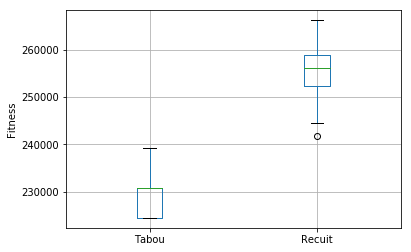

In [12]:
csv_to_boxplot('tai12a',1)

#### Instance Taillard 15 a

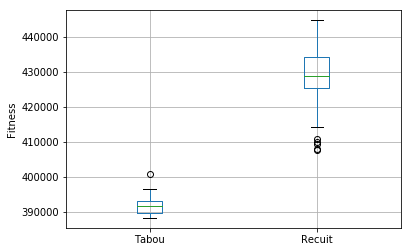

In [13]:
csv_to_boxplot('tai15a',1)

#### Instance Taillard 17 a

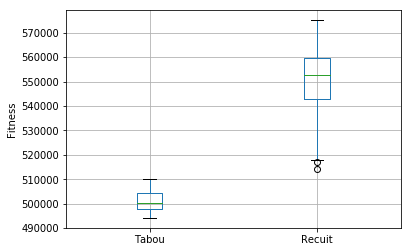

In [14]:
csv_to_boxplot('tai17a',1)

#### Instance Taillard 20 a

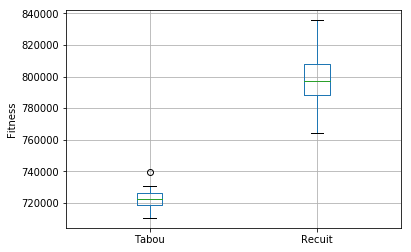

In [15]:
csv_to_boxplot('tai20a',1)

#### Instance Taillard 25 a

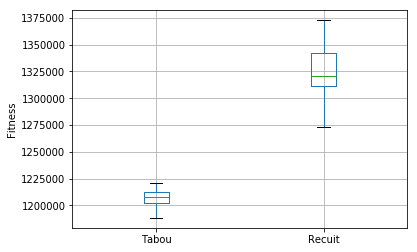

In [16]:
csv_to_boxplot('tai25a',1)

#### Instance Taillard 30 a

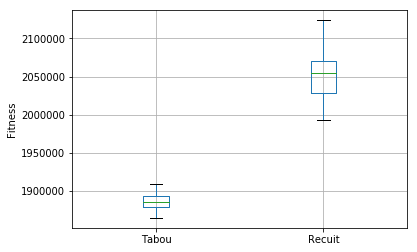

In [17]:
csv_to_boxplot('tai30a',1)

#### Instance Taillard 35 a

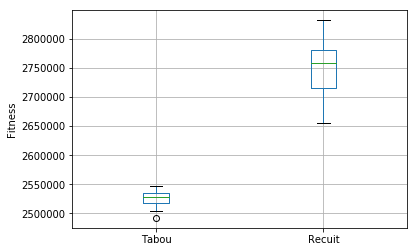

In [18]:
csv_to_boxplot('tai35a',1)

#### Instance Taillard 40 a

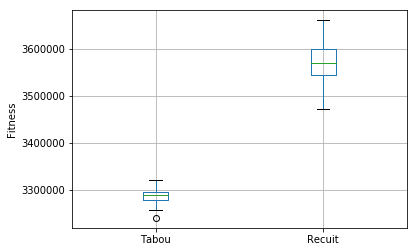

In [19]:
csv_to_boxplot('tai40a',1)

#### Instance Taillard 50 a

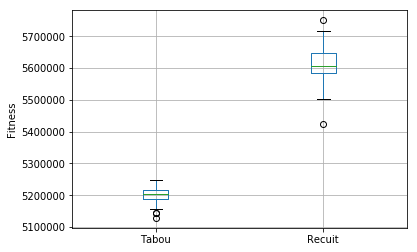

In [20]:
csv_to_boxplot('tai50a',1)

#### Instance Taillard 60 a

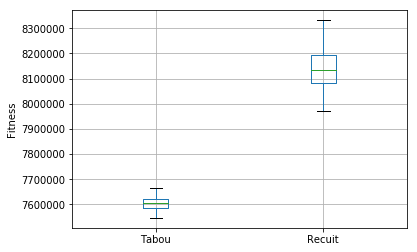

In [21]:
csv_to_boxplot('tai60a',1)

#### Instance Taillard 80 a

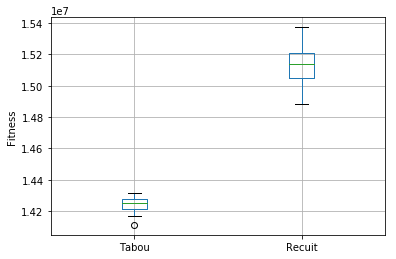

In [22]:
csv_to_boxplot('tai80a',1)

#### Instance Taillard 100 a

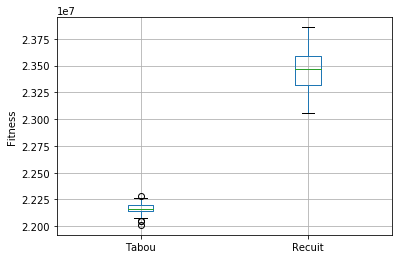

In [23]:
csv_to_boxplot('tai100a',1)

#### Temps de calcul

<Figure size 432x288 with 0 Axes>

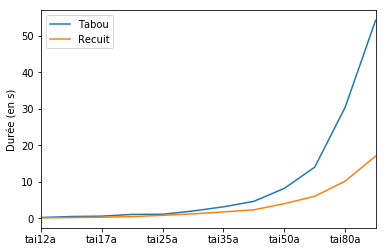

In [24]:
list_instances = ["tai12a", "tai15a", "tai17a", "tai20a", "tai25a", "tai30a", "tai35a", "tai40a", "tai50a", "tai60a", "tai80a", "tai100a"]
csv_to_graph_duree(list_instances)

#### Bilan

## Conclusion

Dans le cadre de ce projet, nous avons pu implémenter les algorithmes de Recuit Simulé et de Tabou qui nous ont permis de résoudre des problèmes d'affectation. Par le bia

Premier projet en python donc pas optimisé au maximum (ex: paralélisation des calculs)